In [1]:
#githubから人事評価結果のデータの読み込み
jinji_hyouka <- read.csv("https://raw.githubusercontent.com/gndb3168/Renshu_data/master/R_MA/Sec_01/jinji_hyouka.csv")

In [2]:
inbox <- colnames(jinji_hyouka)
#ラベルの文字コードが統一されていないとRの結果がjupyter形式で出力されないため、変数名を半角英数字に変更
colnames(jinji_hyouka) <- c("ID", "sex", "dep", "age", "cooperativeness", 
                            "self-assertion", "skill", "knowledge", "stress", "total", "last_year_total")

In [3]:
head(sample)

                                                                   
1 function (x, size, replace = FALSE, prob = NULL)                 
2 {                                                                
3     if (length(x) == 1L && is.numeric(x) && is.finite(x) && x >= 
4         1) {                                                     
5         if (missing(size))                                       
6             size <- x                                            

In [4]:
#githubのデータが読み込めなかったときのローカルファイルからの読み込み

#jinji_hyouka <- read.csv("R_Multivariate_Analysis0726/Sec_01/jinji.csv")
#inbox <- colnames(jinji_hyouka)
##ラベルの文字コードが統一されていないとRの結果がjupyter形式で出力されないため、変数名を半角英数字に変更
#colnames(jinji_hyouka) <- c("ID", "sex", "dep", "age", "cooperativeness", 
#                            "self-assertion", "skill", "knowledge", "stress", "total", "last_year_total")

### 多変量データを読み込んだ際に行うこと
- データの規模を確認する
- 変数名を確認する
- データを数行確認する

In [5]:
#データの規模の確認
dim(jinji_hyouka)

#変数名の確認
colnames(jinji_hyouka)

#データを数行確認
head(jinji_hyouka)

[1] 800  11

[1] "ID"              "sex"             "dep"             "age"            
 [5] "cooperativeness" "self-assertion"  "skill"           "knowledge"      
 [9] "stress"          "total"           "last_year_total"

ID,sex,dep,age,cooperativeness,self-assertion,skill,knowledge,stress,total,last_year_total
1,M,A部,中堅,70,45,65,71,53,251,248
2,F,B部,熟練,45,62,51,72,64,227,211
3,M,A部,中堅,54,70,55,70,61,249,242
4,M,A部,熟練,51,63,53,65,60,232,240
5,F,A部,若手,56,52,44,68,56,217,177
6,M,A部,熟練,51,64,48,73,52,236,216


### 単変量データの基礎集計

- ヒストグラムの描画(latticeパッケージ)
- 代表値と散布度
- ↑2つの群間比較
- 箱ひげ図
- t検定
- 母平均の信頼区間の描画

latticeパッケージは多群の分布の比較を行うヒストグラムの作成に適している

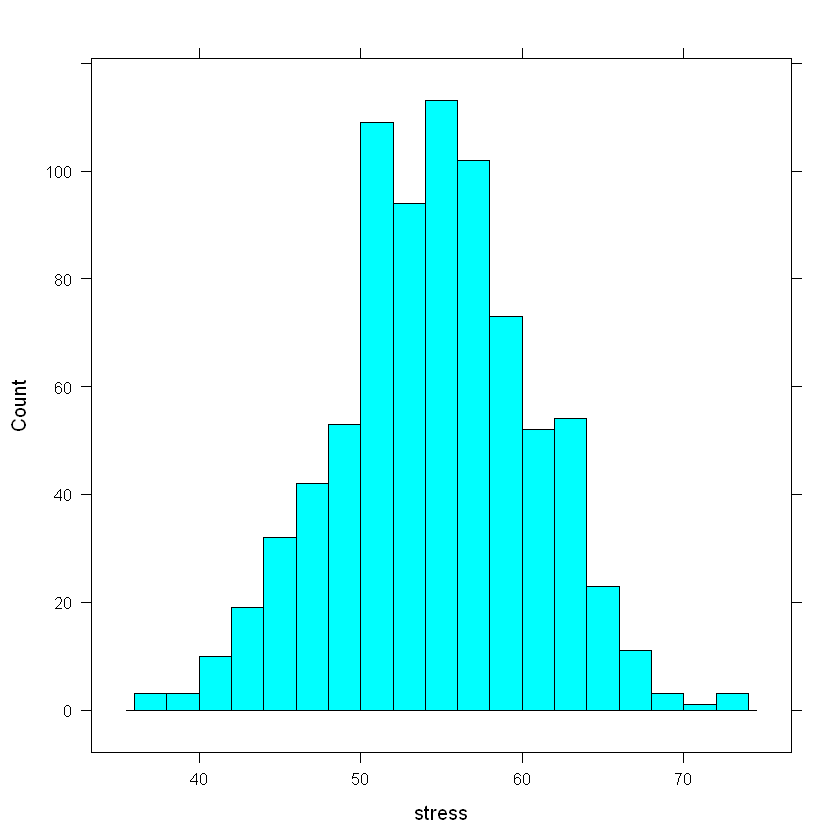

In [6]:
library(lattice)    #latticeパッケージの読み込み

#ヒストグラムの描画
#histogram(~変数, data, 階級数(breaks), 縦軸の指定(type))、countは度数を示す
histogram(~stress, data=jinji_hyouka, breaks=20, type="count")

In [7]:
#代表値の算出

#data.frame()の変数はx$(変数名)でアクセス
mean(jinji_hyouka$stress)     #変数の平均値を算出
median(jinji_hyouka$stress)   #変数の中央値を算出
sort(table(jinji_hyouka$age)) #変数の最頻値を算出(tableは度数分布を作成する関数で、度数分布を昇順に並べ替える)

[1] 55.0525

[1] 55


熟練 中堅 若手 
 177  308  315 

In [8]:
#散布度の算出(データの散らばりに関する統計指標など)

sd(jinji_hyouka$stress)    #不偏標準偏差(平均値からの散らばりを考える際に有用)
var(jinji_hyouka$stress)   #不偏分散

#中央値からの平均偏差の算出(平均値ではなく中央値を代表値として散らばりを求める場合)
mean(abs(jinji_hyouka$stress - median(jinji_hyouka$stress)))

[1] 6.02288

[1] 36.27509

[1] 4.7325

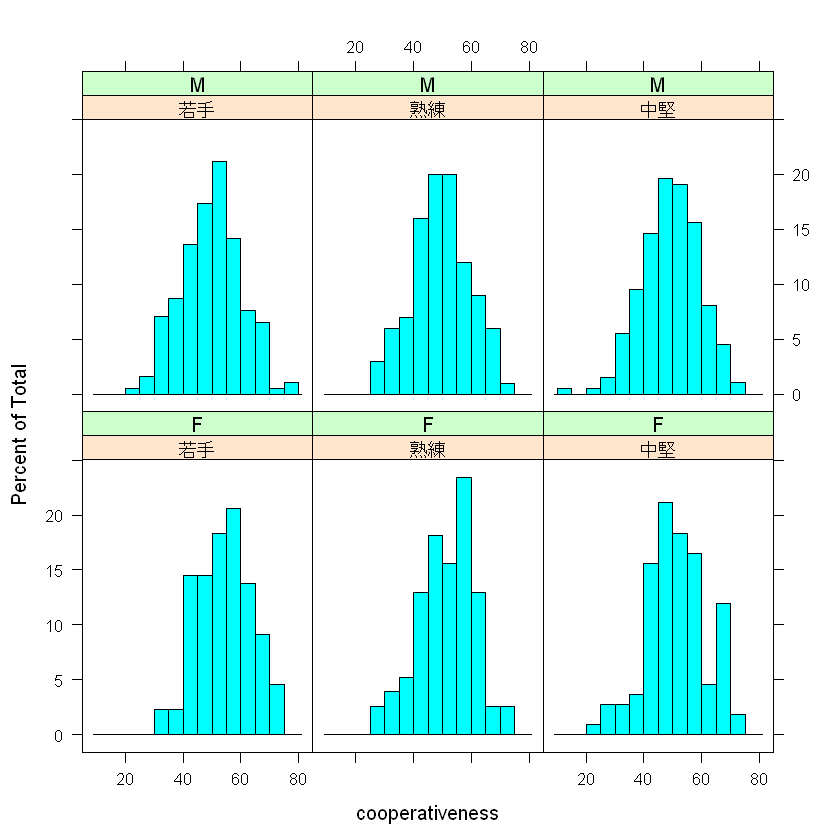

In [9]:
#群別にヒストグラムを描画(latticeパッケージ)
#histogram(~描画する変数|群別変数1+群別変数2+..., data, 階級数(breaks))
histogram(~cooperativeness|age+sex, data=jinji_hyouka, breaks=15)

In [10]:
#群別の代表値と散布度

#tapply(集計したい変数, 群別にしたい変数, 適用関数)
t(tapply(jinji_hyouka$cooperativeness, jinji_hyouka$sex, mean))    #群別で平均値を算出
t(tapply(jinji_hyouka$cooperativeness, jinji_hyouka$sex, sd))      #群別でSDを算出

F,M
52.92114,50.0559


F,M
9.845809,10.11608


### 補足
jupyter上でRのtapply()関数を用いる場合、「添え字が許される範囲外です」とエラーが表示されるものの何故か結果は出力される  
jupyter上ではprint()やt()で囲うことで対処した   
参考URL:[R + jupyter tapply() function gives 'Error: subscript out of bounds'](https://stackoverflow.com/questions/37886584/r-jupyter-tapply-function-gives-error-subscript-out-of-bounds)

#### 箱ひげ図

- データ全体を視覚的に比較できる
- 四分位数・四分位範囲・中央値・最大幅(最大で四分位範囲×1.5)・外れ値など

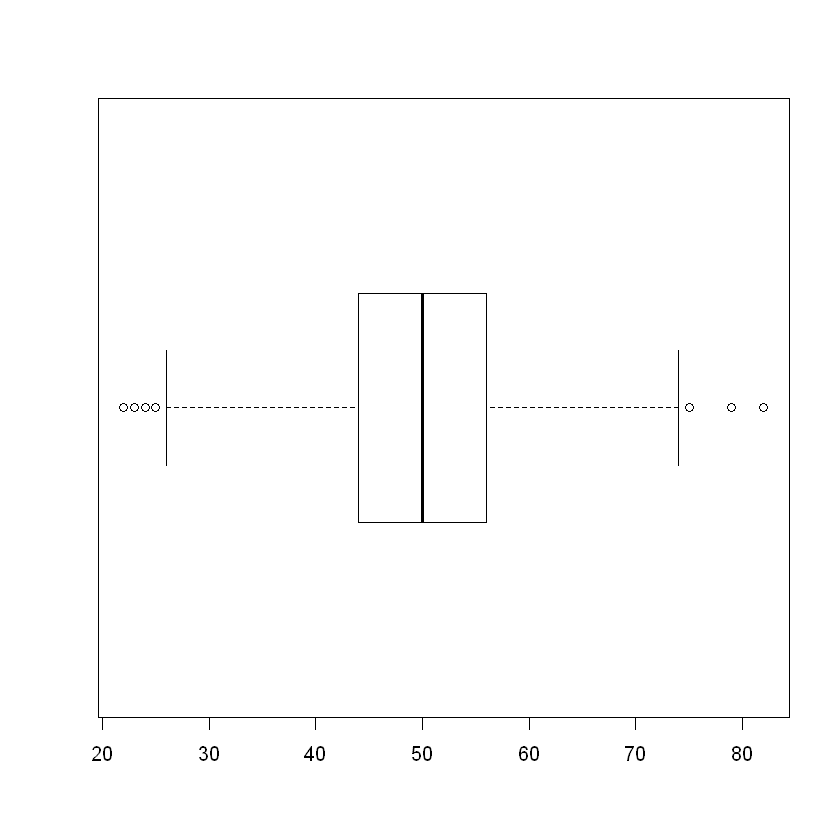

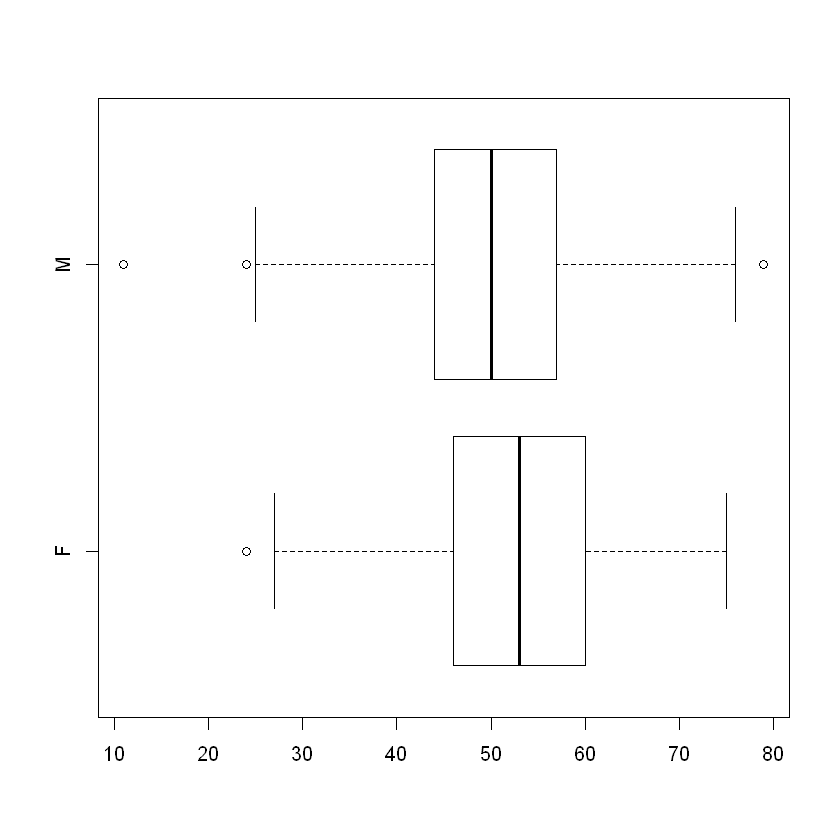

In [11]:
#箱ひげ図の描画

boxplot(jinji_hyouka$skill, horizontal=TRUE)                      #boxplot(量的変数, 横置きor縦置きの指定)
boxplot(cooperativeness~sex, data=jinji_hyouka, horizontal=TRUE)  #boxplot(量的変数「名」~群別変数「名」, ~)で群別でプロット

In [12]:
#四分位数も含めた要約統計量の算出
summary(jinji_hyouka$skill)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  22.00   44.00   50.00   50.01   56.00   82.00 

### t検定

- 母平均の差を統計的に推測する際に用いる(母分散未知)
- 等分散性を調べたい場合はF検定を行う

In [13]:
#等分散性に関するF検定(※帰無仮説は「2群の母分散は等しい」であることに注意)

var.test(cooperativeness~sex, data=jinji_hyouka)    #var.test(量的変数名~群別変数名, data)


	F test to compare two variances

data:  cooperativeness by sex
F = 0.94728, num df = 316, denom df = 482, p-value = 0.6026
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.776489 1.160565
sample estimates:
ratio of variances 
         0.9472802 


In [14]:
#独立な2群のt検定(等分散を仮定)

t.test(cooperativeness~sex, data=jinji_hyouka, var.equal=TRUE)    #t.test(量的変数名~群別変数名, data, 等分散 or not)


	Two Sample t-test

data:  cooperativeness by sex
t = 3.9599, df = 798, p-value = 8.167e-05
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 1.444935 4.285535
sample estimates:
mean in group F mean in group M 
       52.92114        50.05590 


In [15]:
#Welch法によるt検定(等分散の検定が有意だった場合)
t.test(cooperativeness~sex, data=jinji_hyouka)    #t.test()からvar.equalの記述を削除する


	Welch Two Sample t-test

data:  cooperativeness by sex
t = 3.9823, df = 688.8, p-value = 7.552e-05
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 1.452562 4.277908
sample estimates:
mean in group F mean in group M 
       52.92114        50.05590 


In [16]:
#対応のあるt検定(比較対象が同一の母集団である場合)

#比較する量的変数を1つのベクトルにまとめる
score <- c(jinji_hyouka$total, jinji_hyouka$last_year_total)
#比較対象のラベルを要素の数だけ生成し、1つのベクトルにまとめる
year <- c(rep("今年", nrow(jinji_hyouka)), rep("昨年", nrow(jinji_hyouka)))

#t.test(2つの量的データを格納したオブジェクト~2つの比較対象ラベルを(要素の数だけ)格納したオブジェクト, 対応?)
t.test(score~year, paired=TRUE)


	Paired t-test

data:  score by year
t = 0.85118, df = 799, p-value = 0.3949
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.808164  2.045664
sample estimates:
mean of the differences 
                0.61875 


#### 補足
t.testは比較対象の変数とラベルのデータ数が同一でなければならないので注意(引数に入れるラベルはuniqueなデータではない)  
また、青木(2009)は「等分散の場合であっても常にWelchの方法を採用すればよい」という解説をしている。

### 母平均の信頼区間の描画

- 母平均の95%信頼区間は、無数の標本でそれぞれ同様に区間を求めた時に、これらの95%が母平均を含んでいるような区間を示す
- 区間が狭いほど精度の高い母平均の推定が行われている

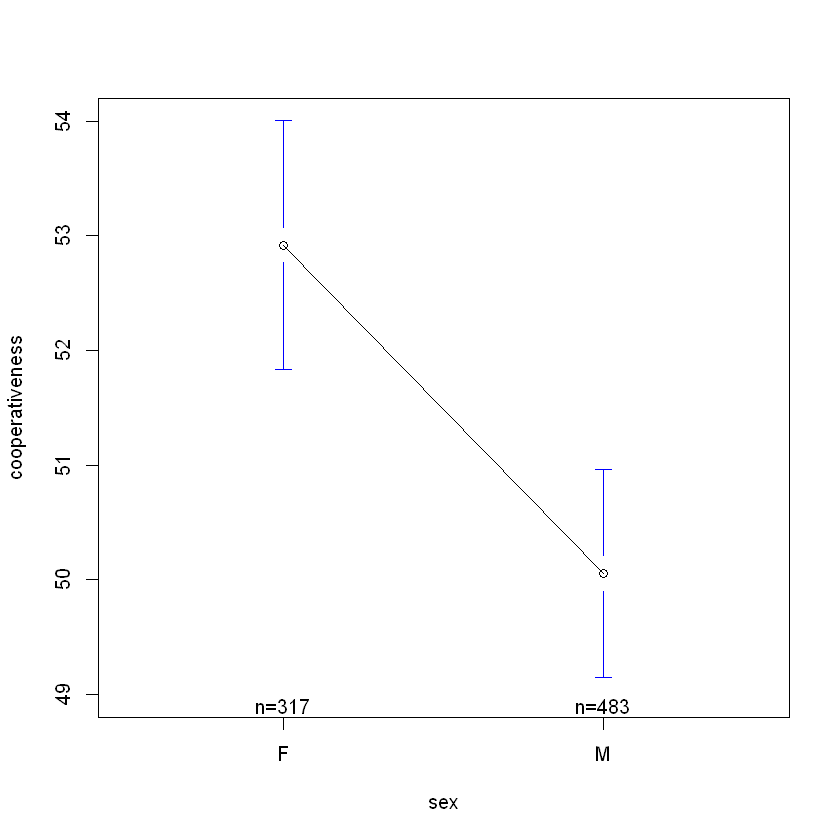

In [17]:
#群ごとに信頼区間を描画(gplotsパッケージ)

#warn.conflicts = FALSE で他のパッケージの関数名と名前が被って片方が上書きされる警告文を非表示した上で読み込む
library(gplots, warn.conflicts = FALSE)    

#plotments(量的変数名~群別変数名, data, 信頼区間の幅, y軸の上限と下限)
plotmeans(cooperativeness~sex, data=jinji_hyouka, p=0.95, ylim=c(49, 54))

#### 補足

パッケージ名の関数名が被って片方の関数が上書きされた場合の警告文  

```R
Attaching package: 'gplots'

The following object is masked from 'package:stats':

    lowess
 ```   

library(~, warn.conflicts = FALSE)で警告文を非表示にできる

In [18]:
#信頼区間の算出
t.test(jinji_hyouka$cooperativeness[jinji_hyouka$sex == "F"])    #t.test()に量的変数を入れることで算出
t.test(jinji_hyouka$cooperativeness[jinji_hyouka$sex == "M"])


	One Sample t-test

data:  jinji_hyouka$cooperativeness[jinji_hyouka$sex == "F"]
t = 95.699, df = 316, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 51.83312 54.00915
sample estimates:
mean of x 
 52.92114 



	One Sample t-test

data:  jinji_hyouka$cooperativeness[jinji_hyouka$sex == "M"]
t = 108.75, df = 482, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 49.15146 50.96034
sample estimates:
mean of x 
  50.0559 


## 多変量データの基礎分析

- 行(列)に対する基礎集計
- 群間比較
- データの標準化
- 相関関係の分析(散布図など)
- 連関の分析
- その他(偏相関係数・カテゴリカルデータの相関係数・効果量)

In [19]:
#列に対する基礎集計

varname <- c("cooperativeness", "self-assertion", "skill", "knowledge")
m_jinji <- jinji_hyouka[, varname]    #mini_jinji(笑)

#変数別に統計量を算出
t(apply(m_jinji, 2, mean))    #apply(データフレーム, 行(1)or列(2)←処理を行う方向, 適用する関数)
t(apply(m_jinji, 2, sd))      #jupyter上では、apply系列の関数は転置した方が綺麗に出力される

cooperativeness,self-assertion,skill,knowledge
51.19125,58.005,50.00625,63.00375


cooperativeness,self-assertion,skill,knowledge
10.10147,11.9929,10.00657,7.995539


In [20]:
#群間で比較

#by(データフレーム, 群データ, 適用する関数, 関数に必要な引数...,)
by(m_jinji, jinji_hyouka$sex, apply, 2, mean)    #データを群ごとに処理(ここでは性別(群)ごとに、列ごとの統計量を算出)
by(m_jinji, jinji_hyouka$sex, apply, 2, sd)      

jinji_hyouka$sex: F
cooperativeness  self-assertion           skill       knowledge 
       52.92114        57.41640        50.37855        63.05678 
------------------------------------------------------------ 
jinji_hyouka$sex: M
cooperativeness  self-assertion           skill       knowledge 
       50.05590        58.39130        49.76190        62.96894 

jinji_hyouka$sex: F
cooperativeness  self-assertion           skill       knowledge 
       9.845809       11.233291       10.153034        7.662786 
------------------------------------------------------------ 
jinji_hyouka$sex: M
cooperativeness  self-assertion           skill       knowledge 
      10.116078       12.462645        9.912231        8.214264 

In [21]:
#データの標準化(変数間の単位の影響をなくす)

zscore <- scale(m_jinji)    #scale()で標準化
head(zscore, 2)
tscore <- zscore*10+50      #偏差値を算出
head(tscore, 2)

cooperativeness,self-assertion,skill,knowledge
1.8619812,-1.0843912,1.49839107,1.000089
-0.6129058,0.3331136,0.09930979,1.125159


cooperativeness,self-assertion,skill,knowledge
68.61981,39.15609,64.98391,60.00089
43.87094,53.33114,50.99310,61.25159


### 多変量データの関係性の分析

- 散布図
- 散布図行列
- 層別散布図
- 相関係数(相関行列・共分散行列)
- 相関係数の検定

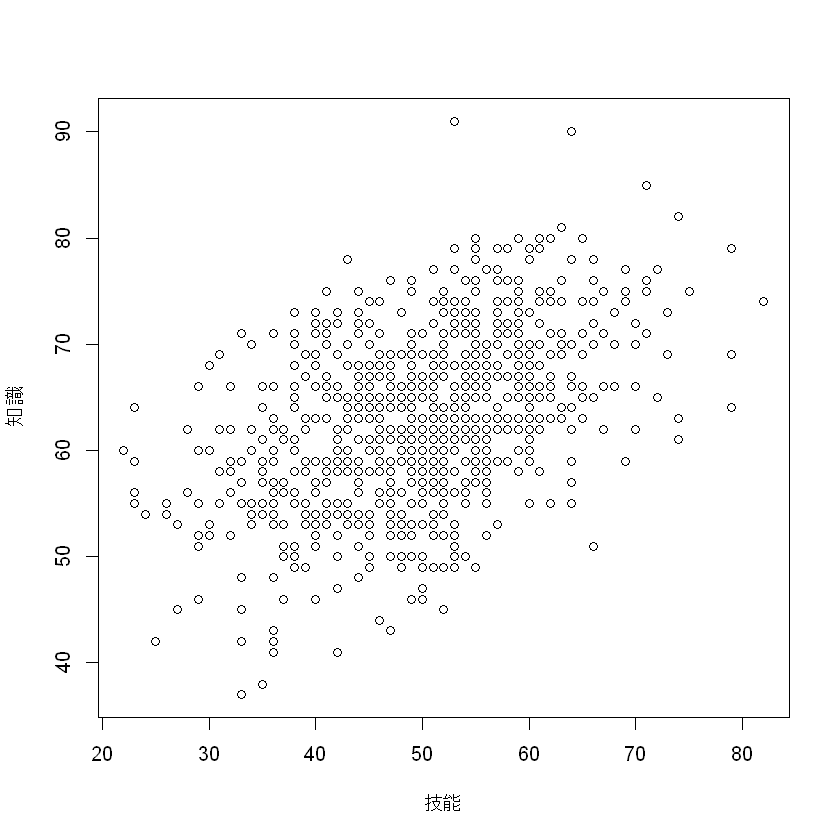

In [22]:
#散布図の描画

ginou <- jinji_hyouka$skill
chisiki <- jinji_hyouka$knowledge
#plot(x軸に置く変数, y軸に置く変数, x軸のラベル, y軸のラベル)
plot(ginou, chisiki, xlab="技能", ylab="知識")

プロットされた散布図から、正の相関があると推測できる

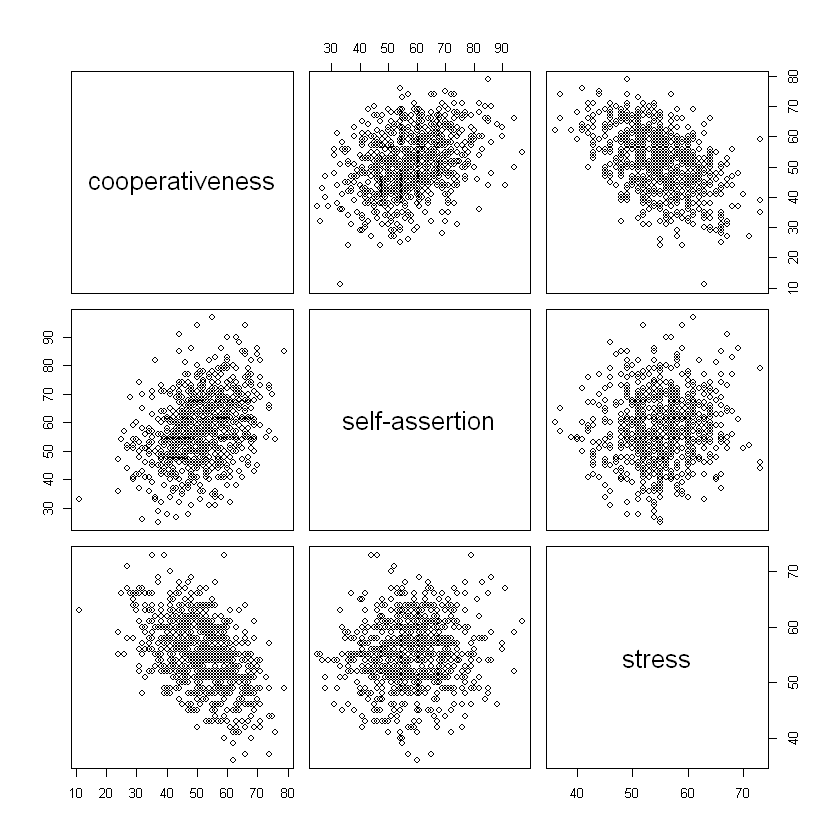

In [23]:
#散布図行列の描画

kjs <- c("cooperativeness", "self-assertion", "stress")    #「協調性」、「自己主張」、「ストレス」
plot(jinji_hyouka[, kjs])

#### 散布図行列の見方

散布図のx軸は散布図がある列の変数、y軸は散布図がある行の変数に対応している。  
左下の散布図であれば、x軸が「協調性」、y軸が「ストレス」になる。  
散布図から、「協調性」と「自己主張」に正の相関がみられる一方で、「協調性」と「ストレス」は負の相関がみられる。

library(lattice)    #層別散布図の出力に必要

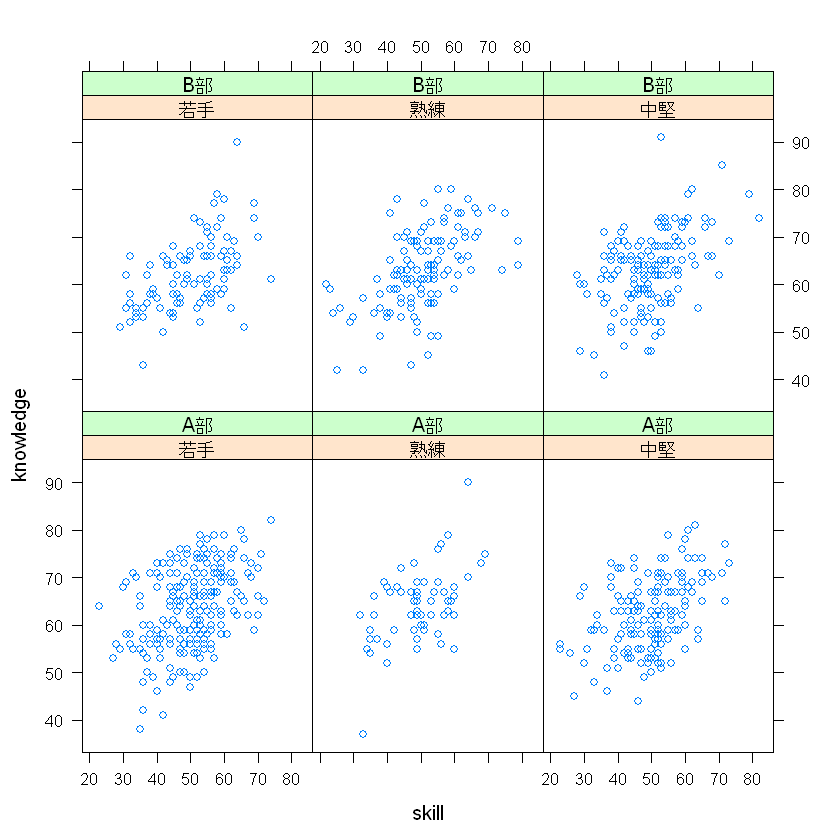

In [24]:
#層別散布図(latticeパッケージ)

xyplot(knowledge~skill|age+dep, data=jinji_hyouka)    #xyplot(y軸の変数~x軸の変数 |層別したい変数1+..., data)

層別散布図より、部署や年代に限らず「技能」と「知識」には正の相関がみられる

In [25]:
#(ピアソンの積率)相関係数の算出
cor(jinji_hyouka$cooperativeness, jinji_hyouka$stress)

[1] -0.507292

In [26]:
#相関行列の算出
cor(jinji_hyouka[, kjs])

,cooperativeness,self-assertion,stress
cooperativeness,1.0000000,0.3486028,-0.5072920
self-assertion,0.3486028,1.0000000,0.1147188
stress,-0.5072920,0.1147188,1.0000000


In [27]:
#共分散の算出(変数の単位に依存する)
cov(jinji_hyouka[, kjs])

,cooperativeness,self-assertion,stress
cooperativeness,102.03972,42.231834,-30.863620
self-assertion,42.23183,143.829762,8.286345
stress,-30.86362,8.286345,36.275088


In [28]:
library(psych)    #相関係数の検定に用いる

In [29]:
#相関係数の検定
corkekka <- corr.test(jinji_hyouka[, kjs])    #corr.test()で検定

corkekka$t    #t値の算出
corkekka$p    #p値の算出

,cooperativeness,self-assertion,stress
cooperativeness,Inf,10.506726,-16.628992
self-assertion,10.50673,Inf,3.262215
stress,-16.62899,3.262215,Inf


,cooperativeness,self-assertion,stress
cooperativeness,0.000000e+00,5.674197e-24,4.625242e-53
self-assertion,2.837099e-24,0.000000e+00,1.152430e-03
stress,1.541747e-53,1.152430e-03,0.000000e+00


※p値の上三角行列はHolm法による多重比較の補正をしたp値を算出  
※無相関検定をする場合は2変数がどちらも正規分布に従っていることが前提
(相関係数から求めた統計量が自由度n-2のt分布に従うことの証明は難しいので割愛(笑))

[無相関検定を行う上での注意事項](http://tomoshige-n.hatenablog.com/entry/2014/09/26/221108)  
[無相関検定の演算](https://bellcurve.jp/statistics/course/9591.html)  
[多重比較の概要](http://www.med.osaka-u.ac.jp/pub/kid/clinicaljournalclub1.html)  
[BonferroniとFDR](http://www.gon-tech.net/article/443528763.html#para6)  

### 連関の分析

連関:質的変数間の関連性
- クロス集計
- 層別クロス集計
- 連関係数
- χ^2検定と残差分析

In [30]:
#クロス集計表の作成

cross <- table(jinji_hyouka$dep, jinji_hyouka$age)    #table(質的変数1, 質的変数2)
cross

     
      若手 熟練 中堅
  A部  216   58  150
  B部   99  119  158

In [31]:
#クロス集計の割合表記

prop.table(cross)    #全度数を基準にした割合表記
prop.table(cross, 1) #行方向の周辺度数の割合表記
prop.table(cross, 2) #列方向の周辺度数の割合表記

     
         若手    熟練    中堅
  A部 0.27000 0.07250 0.18750
  B部 0.12375 0.14875 0.19750

     
           若手      熟練      中堅
  A部 0.5094340 0.1367925 0.3537736
  B部 0.2632979 0.3164894 0.4202128

     
           若手      熟練      中堅
  A部 0.6857143 0.3276836 0.4870130
  B部 0.3142857 0.6723164 0.5129870

行方向のクロス表から、A部は若手が多いのに対し、B部は熟練、中堅が多い

In [32]:
#層別クロス集計表

xtabs(~dep+age+sex, data=jinji_hyouka)    #xtabs(~行方向に表示する変数+列方向に表示する変数+層別変数)

, , sex = F

     age
dep   若手 熟練 中堅
  A部   91   23   53
  B部   40   54   56

, , sex = M

     age
dep   若手 熟練 中堅
  A部  125   35   97
  B部   59   65  102


### 順序カテゴリカル変数の相関係数

- 順序カテゴリカル変数に対しピアソンの積率相関係数を求めると、本来の値より絶対値が小さくなる  
- Rのcorはピアソンの積率相関係数を求める関数のため、順序カテゴリカル変数には不適  
- カテゴリカル変数は背後に潜在変数の存在を仮定したうえで、潜在変数間の相関係数を推定する

#### 順序カテゴリカル変数に対応した相関係数

- ポリコリック(polychoric)相関係数:  
    &emsp;&emsp;順序カテゴリカル変数間の相関係数で、両変数が2値型の場合はテトラコリック(tetorachoric)相関係数と呼ぶ。  
    
    
- ポリシリアル(polyserial)相関係数:  
    &emsp;&emsp;順序カテゴリカル変数と量的変数の相関係数で、順序カテゴリカル変数は2値型の場合はバイシリアル(biserial)相関係数と呼ぶ。

In [33]:
#量的変数をカテゴリカル変数に変換する場合の例(あまり好ましくない)

#2値カテゴリカル変数化するための階級幅の作成
total_breaks <- c(-Inf, mean(jinji_hyouka$total), Inf)    #平均値を境目にした階級幅の作成のためのベクトルを生成
total_breaks

#階級幅を利用してデータを0と1に変換

#cut(カテゴリ化する量的変数, 階級幅を定めるベクトル, 上限値を含むor含まない, カテゴリ名)
total_cat <- cut(jinji_hyouka$total, breaks=total_breaks, right=FALSE, labels=c(0, 1))
head(total_cat)    # Levels:をクリックすると水準が表示される

#3値カテゴリ変数化する場合の階級幅の生成
skill_breaks <- c(-Inf, summary(jinji_hyouka$skill)[c(2, 5)], Inf)
t(skill_breaks)    #←普通に出力すると縦に出力されて見にくいので転置

#階級幅を利用してデータを0, 1, 2に変換
skill_cat <- cut(jinji_hyouka$skill, breaks=skill_breaks, right=FALSE, labels=c(0, 1, 2))
head(skill_cat)

[1]     -Inf 221.0175      Inf

[1] 1 1 1 1 0 1
Levels: 0 1

,1st Qu.,3rd Qu.,
-Inf,44,56,Inf


[1] 2 1 1 1 1 1
Levels: 0 1 2

#### つぶやき

コード内にコメントアウトで環境依存文字(右三角の記号のやつ)を入力したら「Unicodeはアカンで～」と言われた(笑)




#### 順序カテゴリカル変数を含めた相関行列の算出

polycorパッケージを読み込む

In [34]:
#polycorとpsychは同じ名前の関数polyserialがあり、先に呼ばれた方が上書きされてしまうのでwarn.conflicts=F
library(polycor, warn.conflicts = F)    

In [35]:
#順序カテゴリカル変数を含めたデータフレーム
jinji_hyouka_all_cor <- data.frame(total_cat=total_cat, skill_cat=skill_cat, knowledge=jinji_hyouka$knowledge)

#順序カテゴリカル変数を含めた相関行列の算出(polycorパッケージのhetcor関数)

#hetcor(データフレーム, 相関係数の推定方法が最尤法 or two-step法でステイされた最尤法の簡便解)
polycor_res <- hetcor(jinji_hyouka_all_cor, ML=TRUE)    
polycor_res    #演算結果の出力


Maximum-Likelihood Estimates

Correlations/Type of Correlation:
          total_cat  skill_cat  knowledge
total_cat         1 Polychoric Polyserial
skill_cat    0.7973          1 Polyserial
knowledge    0.6329     0.4558          1

Standard Errors:
          total_cat skill_cat
total_cat                    
skill_cat   0.02391          
knowledge   0.02811   0.03074

n = 800 

P-values for Tests of Bivariate Normality:
          total_cat skill_cat
total_cat                    
skill_cat    0.3198          
knowledge    0.1545    0.1056

In [36]:
#出力結果に含まれる要素を確認
str(polycor_res)          

List of 7
 $ correlations: num [1:3, 1:3] 1 0.797 0.633 0.797 1 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:3] "total_cat" "skill_cat" "knowledge"
  .. ..$ : chr [1:3] "total_cat" "skill_cat" "knowledge"
 $ type        : chr [1:3, 1:3] "" "Polychoric" "Polyserial" "Polychoric" ...
 $ NA.method   : chr "complete.obs"
 $ ML          : logi TRUE
 $ std.errors  : num [1:3, 1:3] 0 0.0239 0.0281 0.0239 0 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:3] "total_cat" "skill_cat" "knowledge"
  .. ..$ : chr [1:3] "total_cat" "skill_cat" "knowledge"
 $ n           : int 800
 $ tests       : num [1:3, 1:3] 0 0.32 0.154 0 0 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:3] "total_cat" "skill_cat" "knowledge"
  .. ..$ : chr [1:3] "total_cat" "skill_cat" "knowledge"
 - attr(*, "class")= chr "hetcor"


In [37]:
#順序カテゴリカル変数を含めた相関係数のみ出力する
polycor_res$correlations  

,total_cat,skill_cat,knowledge
total_cat,1.0000000,0.7973437,0.6329281
skill_cat,0.7973437,1.0000000,0.4558098
knowledge,0.6329281,0.4558098,1.0000000


相関係数のみ出力した場合、相関係数の種類がpearsonなのかpolychoricなのかpolyserialなのか分かりづらい。  
そのため、片側の三角行列に相関係数のタイプを代入する

In [38]:
#相関係数の種類を示す行列
polycor_res$type

#元の演算結果を上書きしないようにコピーを作る(&コード短縮)
poly_cor <- polycor_res$correlations    

#順序カテゴリカル変数を含めた相関係数行列の上三角成分にtype行列の上三角成分の値を代入
poly_cor[upper.tri(poly_cor)] <- polycor_res$type[upper.tri(polycor_res$type)]
poly_cor

,Polychoric,Polyserial
Polychoric,,Polyserial
Polyserial,Polyserial,


,total_cat,skill_cat,knowledge
total_cat,1,Polychoric,Polyserial
skill_cat,0.79734372834492,1,Polyserial
knowledge,0.63292810102076,0.455809824192717,1


### 効果量

なぜ効果量が必要なのか?  
&emsp;&emsp;→サンプルサイズの問題
- t検定などの統計的仮設検定はサンプルサイズが大きいとどんな帰無仮説も棄却されてしまう
- サンプルサイズを大きくしようとするとコスト面や安全面の問題がある
- 効果量は「検出したい差の程度」や「変数間の関係の強さ」を示す
- 効果量はサンプルサイズに依存しない実験の効果を示すことが出来る(サンプルが小さすぎなければ)
- 標本サイズの設計には「有意水準」、「検出力」、「効果量」の値が必要
- 効果量が大きいときはサンプルサイズが小さくすることが出来る

[「効果量」とは?](https://bellcurve.jp/statistics/course/12752.html)

### 効果量の例

d族とr族に分かれる
- d族:効果量が<span style="color:red">「差の大きさ」</span>を示す  
    - Cohenのd
    - Hedgesのg
      
      
- r族:効果量が<span style="color:red">「相関の強さ」</span>を示す

※上記の代表的なd族は母集団の効果量の不偏推定量(「修正済みg」)ではない

#### 独立な2群のt検定における効果量


$$
    t = d \sqrt{\frac{n_1 n_2}{n_1 + n_2}}
$$

#### Cohenのd

$$ d = \frac{ \bar{x_1} - \bar{x_2} }{ s^* }, \qquad s^* = \sqrt{ \frac{ n_1 s^2_1 + n_2 s^2_2 }{ n_1 + n_2 -2 } } $$

t値より、効果量dに関係なく、サンプルサイズが大きく大きくなるほどt値は大きくなり、検定結果は優位になりやすくなる

#### つぶやき
単一行の数式番号無しの数式は`$$~$$`は上手くいったけど、  
`\[ ~ \]`と`\begin{displaymath}~\end{displaymath}`は上手くいかなかった。謎。

In [39]:
####(続きのコード用)

## 章末演習

### 問1

関数read.csvを用いて「学力調査結果.csv」を読み込んでmatに保存。  
histogram(latticeパッケージ)とboxplotを利用し、「プレ得点」について「部活」別にヒストグラムと箱ひげ図(水平方向)に描画せよ。

In [40]:
#githubから学力調査データの読み込み
mat <- read.csv("https://raw.githubusercontent.com/gndb3168/Renshu_data/master/R_MA/Sec_01/gakuryoku_tyousa.csv")

In [41]:
dim(mat)      #データの大きさの確認
colnames(mat) #変数名の確認
head(mat)     #データの表示

[1] 800  12

[1] "ID"         "性別"       "部活"       "進路"       "意欲"      
 [6] "プレ得点"   "国語"       "社会"       "数学"       "理科"      
[11] "英語"       "ポスト得点"

ID,性別,部活,進路,意欲,プレ得点,国語,社会,数学,理科,英語,ポスト得点
1,F,無所属,文系,54,269,59,62,58,55,53,287
2,F,文化系,文系,25,162,49,53,62,53,55,272
3,M,文化系,文系,25,123,43,43,37,32,37,192
4,F,無所属,文系,48,176,63,49,54,40,52,258
5,M,体育系,文系,41,172,55,56,40,58,44,253
6,M,体育系,理系,36,140,40,34,37,32,42,185


In [42]:
library(lattice)    #histogram関数を使うためのパッケージ

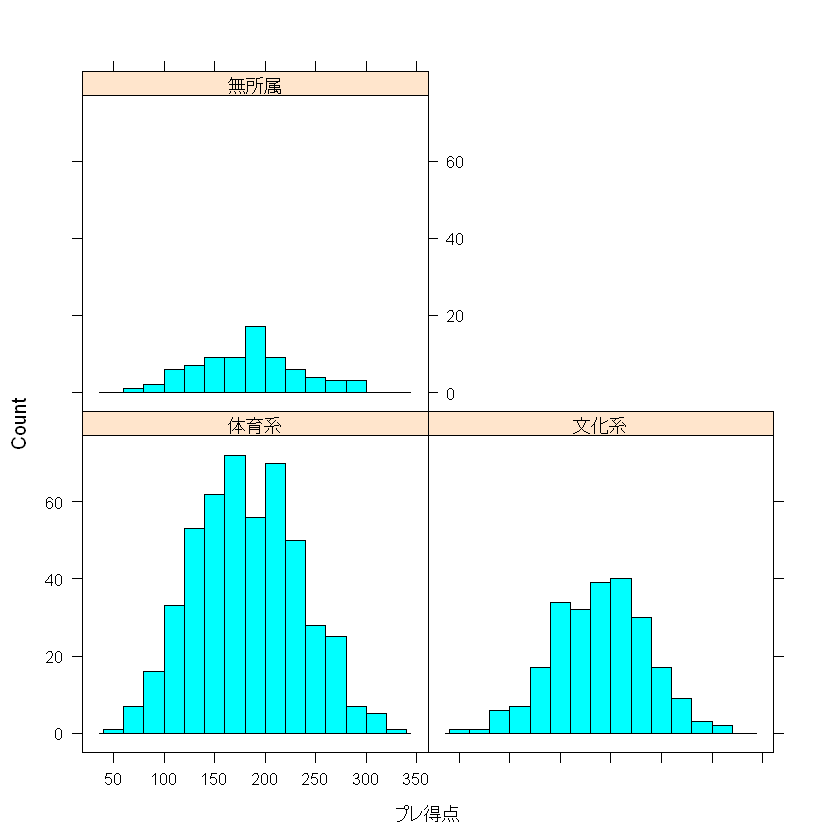

In [43]:
histogram(~プレ得点|部活, data=mat, breaks=10, type="count")

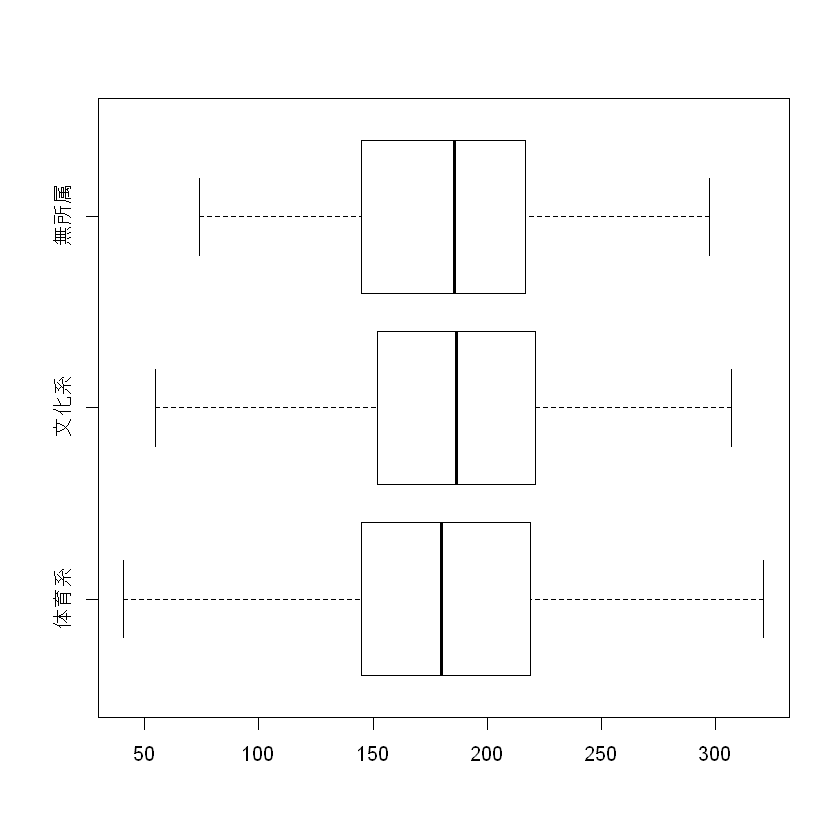

In [44]:
boxplot(プレ得点~部活, data=mat, horizontal=TRUE)

### 問2

関数tapplyを利用して「プレ得点」について「部活」別に平均値と中央値とSDを求めよ。

In [45]:
pre_test_mean_by_club <- tapply(mat$プレ得点, mat$部活, mean)
t(pre_test_mean_by_club)

pre_test_median_by_club <- tapply(mat$プレ得点, mat$部活, median)
t(pre_test_median_by_club)

pre_test_sd_by_club <- tapply(mat$プレ得点, mat$部活, sd)
t(pre_test_sd_by_club)

体育系,文化系,無所属
182.6379,188.8655,183.5


体育系,文化系,無所属
180,186.5,185.5


体育系,文化系,無所属
51.48008,46.30607,49.1855


### 問3

関数t.testを利用して「数学」について「性別」を群として独立な2群のt検定(等分散を仮定)を実行せよ。  
また、関数effected1によって効果量とその95%信頼区間を求めたうえで検定結果の報告をせよ。

In [46]:
mat_t_res <- t.test(数学~性別, data=mat, var.equal=TRUE)
mat_t_res


	Two Sample t-test

data:  数学 by 性別
t = -0.30619, df = 798, p-value = 0.7595
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.742079  1.271932
sample estimates:
mean in group F mean in group M 
       54.12879        54.36386 
